In [1]:
import xmle
from xmle import Reporter, NumberedCaption, Elem, Show

In [2]:
xmle.__version__

'0.1.15'

The `Show` command accepts a wide variety of inputs, and outputs a 
rendered static XML output suitable for use in a HTML document, or
for rendering directly in a Jupyter notebook.

In [3]:
Show("""

Using reStructuredText
======================

You can add sections of prose formatted using the reStructuredText markup
syntax.  Just compose a string and pass it to the ``Show`` function, and
you'll get a neatly formatted output.

The default interpreter for ``str`` input to the ``Show`` function is 
reStructuredText, so you don't need to do anything special.  One caveat, 
though: the default for reStructuredText items is to step down headings by
two levels.  So, the heading tag on this section will be ``h3`` not ``h1``.

Deeper Headings are Stepped Down Also
-------------------------------------

So the heading on this section will be ``h4``.  Each block of 
reStructuredText is evaluated seperately, so knowledge of heading levels and
which styles correspond to them is lost when evaluating a different string.

Prevent Interpreting The First Heading as a Title
=================================================

If the first heading is at the beginning of the "document" and it is the 
only heading at that level, it is interpreted as the "title" and subsequent 
headings are stepped up a level.  This is how the standard docutils interpreter
handles these cases.

""")

<xmle.Elem 'div' with 2 children>

You can also use the `Reporter` class, which will both render the inputs in
Jupyter and store them to eventually be written out to a HTML file.

In [4]:
R = Reporter()

Simple titles on a single line can be created using the markdown syntax (one hash for `h1`, two for `h2`, etc.)

In [5]:
R << "# A Title is Born"

<xmle.Elem 'div' with 1 children>

In [6]:
R << "## Also a Subtitile"

<xmle.Elem 'div' with 2 children>

Automatically numbered captions can be created using `NumberedCaption`.
Just define a type using the contructor...

In [7]:
FIG = NumberedCaption('Figure')

Then call that type to create a caption.  Captions are not actually 
numbered when shown in Jupyter, but numbers are added when saving
an HTML report.

In [8]:
R << FIG('An Example')
R << "Some plain old text as a figure."

<xmle.Elem 'div' with 4 children>

You can add figures in PNG or SVG format as well.

In [9]:
import networkx
g = networkx.DiGraph()
for i in range(3):
    g.add_edge(i, i+1)
    g.add_edge(-1, i)
    g.add_edge(i, 999)

<xmle.Elem 'div' with 6 children>
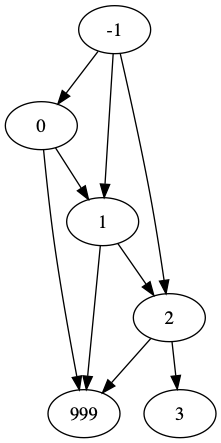

In [10]:
R << FIG('Network Graph PNG Example')
R << networkx.drawing.nx_pydot.to_pydot(g).create_png()

In [11]:
R << FIG('Network Graph SVG Example')
R << networkx.drawing.nx_pydot.to_pydot(g).create_svg()

<xmle.Elem 'div' with 8 children>

You can save out the report to an HTML file.  Optionally save pickle-able 
objects in metadata, which will be embedded in the HTML and can be recovered later.

In [12]:
R.save('./123.html', overwrite=True, metadata={'g':g, })

'./123.html'

It will create a nicely formatted file, with a table of contents
in a sidebar, listing the headings for convenient navigation.

In [13]:
from IPython.display import IFrame
IFrame(src='./123.html', width=800, height=400)

Recover metadata using the `load_metadata` function.

In [14]:
meta = xmle.load_metadata('/tmp/123.html')
meta['g']